<a href="https://colab.research.google.com/github/krish-Algometrix/Machine-Learning-Projects/blob/main/VIX_2_Indiv_minorproject_Sem3_part_2_AA_SC_P2MCA2107470.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.callbacks import EarlyStopping

In [ ]:
from numpy import array

In [ ]:
from pandas import datetime

<ipython-input-6-5d3ca00b7d92>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [ ]:
pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow as tf


In [ ]:
print(tf. __version__)

2.12.0


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from math import sqrt

In [ ]:
import seaborn as sns
import datetime as dt
from IPython.core.display import Image, display
import pickle
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
from keras.callbacks import History
history = History()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path =  "/content/drive/MyDrive/cvix.csv"

In [ ]:
vix = pd.read_csv(path)
type(vix)

pandas.core.frame.DataFrame

In [ ]:
vix.head(3)


,date,cvs
0,02-01-1990,17.24
1,03-01-1990,18.19
2,04-01-1990,19.22


In [ ]:
vix.describe()

,cvs
count,8374.000000
mean,19.675254
std,7.969064
min,9.140000
25%,13.910000
50%,17.880000
75%,23.140000
max,82.690000


In [ ]:
vix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8374 entries, 0 to 8373
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    8374 non-null   object 
 1   cvs     8374 non-null   float64
dtypes: float64(1), object(1)
memory usage: 131.0+ KB


In [ ]:
# checking for Null values
pd.isna(vix)

,date,cvs
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
8369,False,False
8370,False,False
8371,False,False
8372,False,False


In [ ]:
vix['cvret'] = vix['cvs'].pct_change()
vix.fillna(0, inplace=True)

In [ ]:
vix['cvar'] = vix['cvret']**2

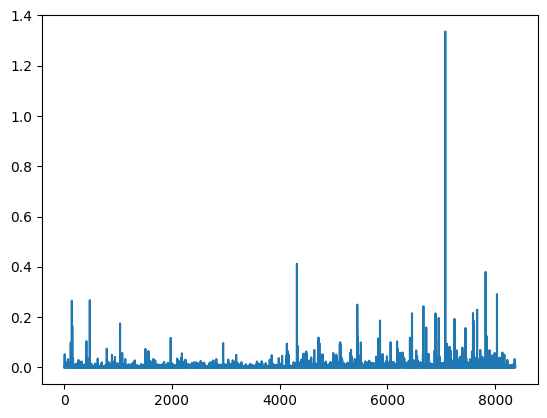

In [ ]:
plt.plot(vix['cvar'])

In [ ]:
vix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8374 entries, 0 to 8373
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    8374 non-null   object 
 1   cvs     8374 non-null   float64
 2   cvret   8374 non-null   float64
 3   cvar    8374 non-null   float64
dtypes: float64(3), object(1)
memory usage: 261.8+ KB


In [ ]:
vix_cvar = vix['cvar']
vix_cvar.head(10)

0    0.000000
1    0.003036
2    0.003206
3    0.002144
4    0.000056
5    0.009169
6    0.000117
7    0.011344
8    0.052408
9    0.004760
Name: cvar, dtype: float64

Preparing the data for LSTM algorithm

In [ ]:
vix['cvar_t_1'] = vix['cvar'].shift(1)
vix.fillna(0, inplace=True)
vix

,date,cvs,cvret,cvar,cvar_t_1
0,02-01-1990,17.24,0.000000,0.000000,0.000000
1,03-01-1990,18.19,0.055104,0.003036,0.000000
2,04-01-1990,19.22,0.056625,0.003206,0.003036
3,05-01-1990,20.11,0.046306,0.002144,0.003206
4,06-01-1990,20.26,0.007459,0.000056,0.002144
...,...,...,...,...,...
8369,01-12-2012,25.51,0.109613,0.012015,0.014521
8370,02-12-2012,24.15,-0.053312,0.002842,0.012015
8371,03-12-2012,21.38,-0.114700,0.013156,0.002842
8372,04-12-2012,22.26,0.041160,0.001694,0.013156


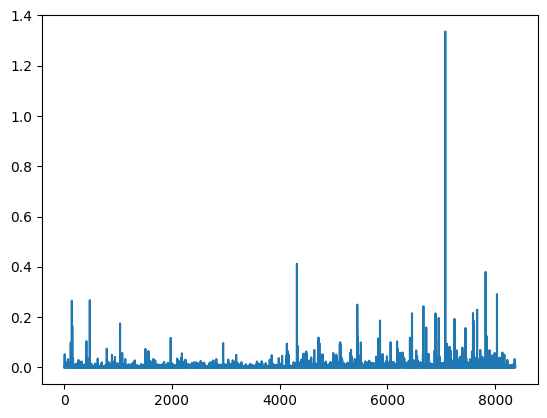

In [ ]:
# we are concerned with the variance of VIX index which is the square of the returns of VIX index prices.
vixvol= vix['cvar']

plt.plot(vixvol)

In [ ]:
vixvol.head(10)
vixvol.info()

<class 'pandas.core.series.Series'>
RangeIndex: 8374 entries, 0 to 8373
Series name: cvar
Non-Null Count  Dtype  
--------------  -----  
8374 non-null   float64
dtypes: float64(1)
memory usage: 65.5 KB


In [ ]:
type(vixvol)

pandas.core.series.Series

below we define a function that helps us to convert the univariate series into X and Y variables where X is a lagged series and Y is a series that looks back hence the look back parameter

In [ ]:
type(vixvol)

pandas.core.series.Series

In [ ]:

def data_to_lagseries(vixvol_arr, look_back):
   X, Y =[], []
   for i in range(len(vixvol_arr)-look_back):
    d=i+look_back
    X.append(vixvol_arr[i:d,])
    Y.append(vixvol_arr[d,])
    return np.array(X), np.array(Y)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
#create numpy.ndarray
vixvol_arr = vixvol.to_numpy()
vixvol_arr.shape, print(vixvol_arr)

[0.         0.0030365  0.00320634 ... 0.01315604 0.00169414 0.00024722]


((8374,), None)

In [ ]:
vixvol_arr = np.reshape(vixvol_arr, (-1, 1)) #LTSM requires more input features compared to RNN or DNN
vixvol_arr.shape, print(vixvol_arr)

[[0.        ]
 [0.0030365 ]
 [0.00320634]
 ...
 [0.01315604]
 [0.00169414]
 [0.00024722]]


((8374, 1), None)

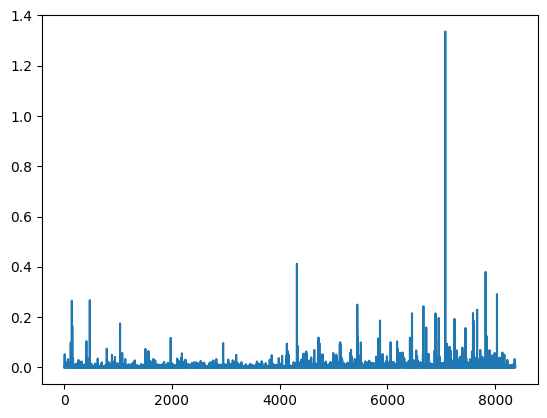

In [ ]:
plt.plot(vixvol_arr)

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))#LTSM is senstive to the scale of features


[[0.        ]
 [0.00227234]
 [0.00239944]
 ...
 [0.00984522]
 [0.0012678 ]
 [0.00018501]]


(None, (8374, 1), [<matplotlib.lines.Line2D at 0x7f8fb06d2170>])

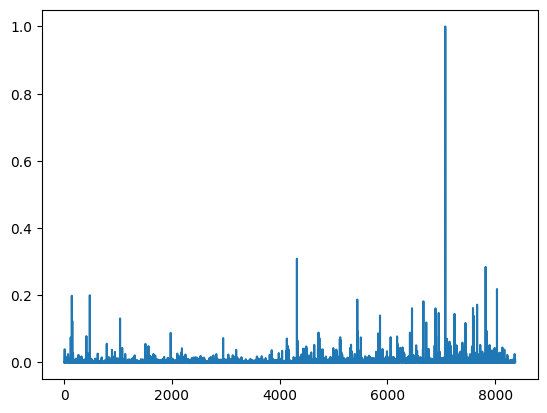

In [ ]:
vixvol_arr = scaler.fit_transform(vixvol_arr)
print(vixvol_arr),vixvol_arr.shape,plt.plot(vixvol_arr)

In [ ]:
train_size = 8000
test_size = len(vixvol_arr)-train_size
train, test = vixvol_arr[0:train_size,:], vixvol_arr[train_size:len(vixvol_arr),:]
look_back = 1
trainX, trainY = data_to_lagseries(train, look_back)
testX, testY = data_to_lagseries(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [ ]:
print(train.shape)

(8000, 1)


In [ ]:
print(test.shape)

(374, 1)


The reshaping of the train and test series ensures that the program will read onevalue at every time step taking into account the look back which is the lag. So the first look back will be 30 values and the 31st value which is the Y value which needs to be regressed against the past 30 values of the train seriess which is the lagged series

In [ ]:
print(trainX.shape) # one sample in the curren position , one time step , one columnar feature

(1, 1, 1)


In [ ]:
print(testX.shape)# one sample in the curren position , one time step , one columnar feature .

(1, 1, 1)


In [ ]:
#scaler = MinMaxScaler(feature_range=(0, 1))#LTSM is senstive to the scale of features
#vixvol_arr = scaler.fit_transform(vixvol)

Defining the fitting of LSTM model so that the problem can be set for solving

In [ ]:

def model_lstm(look_back):
  model=Sequential()
  model.add(LSTM(100, input_shape=(1, look_back), activation='relu'))
  model.add(Dense(1))
  model.compile(loss='mean_squared_error',  optimizer='adam',metrics = ['mse', 'mae'])
  return model

In [ ]:
from keras.callbacks import History
history = History()

In [ ]:
vixvolmodel  = model_lstm(look_back)
history = vixvolmodel.fit(trainX,trainY,epochs = 50,batch_size = 50, validation_data = (testX,testY),callbacks = [history],shuffle =False)

Epoch 1/50
1/1 [==============================] - 2s 2s/step - loss: 1.6464e-05 - mse: 1.6464e-05 - mae: 0.0041 - val_loss: 1.1562e-06 - val_mse: 1.1562e-06 - val_mae: 0.0011
Epoch 2/50
1/1 [==============================] - 0s 43ms/step - loss: 9.3515e-06 - mse: 9.3515e-06 - mae: 0.0031 - val_loss: 8.5693e-09 - val_mse: 8.5693e-09 - val_mae: 9.2571e-05
Epoch 3/50
1/1 [==============================] - 0s 45ms/step - loss: 4.3070e-06 - mse: 4.3070e-06 - mae: 0.0021 - val_loss: 7.2634e-07 - val_mse: 7.2634e-07 - val_mae: 8.5225e-04
Epoch 4/50
1/1 [==============================] - 0s 61ms/step - loss: 1.2780e-06 - mse: 1.2780e-06 - mae: 0.0011 - val_loss: 2.9846e-06 - val_mse: 2.9846e-06 - val_mae: 0.0017
Epoch 5/50
1/1 [==============================] - 0s 59ms/step - loss: 6.5109e-08 - mse: 6.5109e-08 - mae: 2.5517e-04 - val_loss: 6.2077e-06 - val_mse: 6.2077e-06 - val_mae: 0.0025
Epoch 6/50
1/1 [==============================] - 0s 57ms/step - loss: 2.5885e-07 - mse: 2.5885e-07 - mae

In [ ]:
vixvolmodel.save_weights('LSTMBasic1.h5')
W = vixvolmodel.layers[1].get_weights()
U = vixvolmodel.layers[1].get_weights()
b = vixvolmodel.layers[1].get_weights()

In [ ]:
vixvolmodel.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_7 (LSTM)               (None, 100)               40800     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [ ]:
train_predict = vixvolmodel.predict(trainX)


1/1 [==============================] - 0s 190ms/step


In [ ]:
test_predict = vixvolmodel.predict(testX)

1/1 [==============================] - 0s 23ms/step


inverting the predictions to original values as in the train and test data that is before mini max transformation

In [ ]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [ ]:
type(train_predict)
type(test_predict)

numpy.ndarray

In [ ]:
trainY = scaler.inverse_transform(trainY)
testY = scaler.inverse_transform(testY)

In [ ]:
type(trainY)
type(testY)

numpy.ndarray

In [ ]:
print('Train Root Mean Squared Error(RMSE): %.2f; Train Mean Absolute Error(MAE) : %.2f '% (np.sqrt(mean_squared_error(trainY[0], train_predict[:,0])),(mean_absolute_error(trainY[0], train_predict[:,0]))))
print('Test Root Mean Squared Error(RMSE): %.2f; Test Mean Absolute Error(MAE) : %.2f '% (np.sqrt(mean_squared_error(testY[0], test_predict[:,0])),(mean_absolute_error(testY[0], test_predict[:,0]))))
vixvolmodel.history

Train Root Mean Squared Error(RMSE): 0.00; Train Mean Absolute Error(MAE) : 0.00 
Test Root Mean Squared Error(RMSE): 0.00; Test Mean Absolute Error(MAE) : 0.00 


In [ ]:
print(np.sqrt(mean_squared_error(trainY[0], train_predict[:,0])),(mean_absolute_error(trainY[0], train_predict[:,0])))

1.1257277297168494e-05 1.1257277297168494e-05


In [ ]:
print(np.sqrt(mean_squared_error(testY[0], test_predict[:,0])),(mean_absolute_error(testY[0], test_predict[:,0])))

0.0020353714894671606 0.0020353714894671606


In [ ]:
print(history.history.keys())

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


In [ ]:
history.history

In [ ]:
loss_metrics = pd.DataFrame.from_dict(history.history)
loss_metrics.head(50)

,loss,mse,mae,val_loss,val_mse,val_mae
0,1.646438e-05,1.646438e-05,0.004058,1.156221e-06,1.156221e-06,0.001075
1,9.351541e-06,9.351541e-06,0.003058,8.569329e-09,8.569329e-09,0.000093
2,4.306962e-06,4.306962e-06,0.002075,7.263376e-07,7.263376e-07,0.000852
3,1.278024e-06,1.278024e-06,0.001130,2.984555e-06,2.984555e-06,0.001728
4,6.510925e-08,6.510925e-08,0.000255,6.207678e-06,6.207678e-06,0.002492
5,2.588463e-07,2.588463e-07,0.000509,9.609909e-06,9.609909e-06,0.003100
6,1.248211e-06,1.248211e-06,0.001117,1.240737e-05,1.240737e-05,0.003522
7,2.370545e-06,2.370545e-06,0.001540,1.408731e-05,1.408731e-05,0.003753
8,3.134864e-06,3.134864e-06,0.001771,1.451464e-05,1.451464e-05,0.003810
9,3.338134e-06,3.338134e-06,0.001827,1.384497e-05,1.384497e-05,0.003721


([<matplotlib.lines.Line2D at 0x7f8fb045cd30>],
 [<matplotlib.lines.Line2D at 0x7f8fb045c790>])

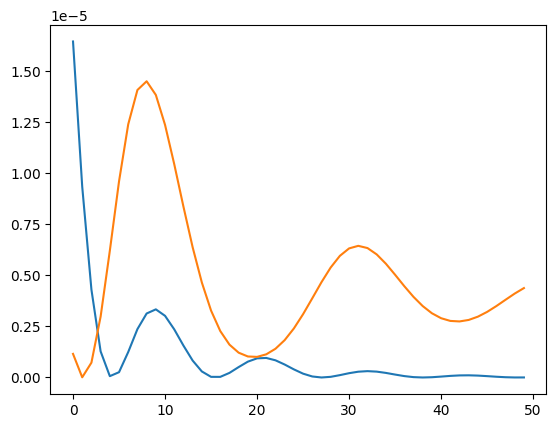

In [ ]:
plt.plot(loss_metrics['mse']), plt.plot(loss_metrics['val_mse'])


([<matplotlib.lines.Line2D at 0x7f8fb05269b0>],
 [<matplotlib.lines.Line2D at 0x7f8fb8bda800>])

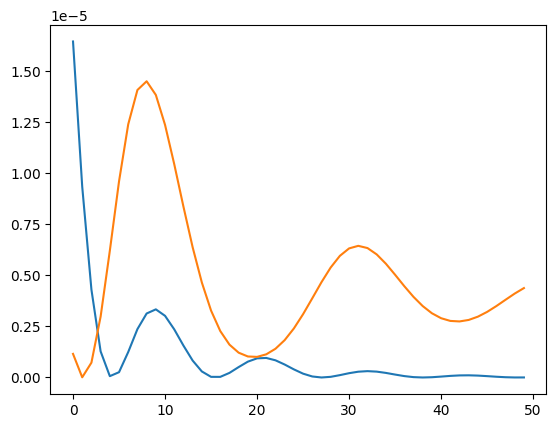

In [ ]:
plt.plot(loss_metrics['loss']), plt.plot(loss_metrics['val_loss'])

In [ ]:
eval_results = vixvolmodel.evaluate(testX,testY, batch_size = 50)

1/1 [==============================] - 0s 31ms/step - loss: 4.3810e-06 - mse: 4.3810e-06 - mae: 0.0021


In [ ]:
print(eval_results)

[4.381016879051458e-06, 4.381016879051458e-06, 0.0020930878818035126]


In [ ]:
predictions = vixvolmodel.predict(testY)

1/1 [==============================] - 0s 37ms/step


In [ ]:
print(predictions)

[[0.00416807]]


Overall the fit of the LSTM model is inferior as compared to the ARCH model when residuals are compared